In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns

In [2]:
df = pd.read_csv('../data/jobs_3.csv')
df.head()

,country,title,text,job_title
0,AT,Inform,Information Technology Security Manager Global...,Information Technology Security Manager
1,AT,Architect,Information Security Architect Copmany SWAROVS...,Information Security Architect
2,AT,Manager,Information Technology Security Manager Copman...,Information Technology Security Manager
3,AT,Analyst,Threat Detection Analyst Company Radar Cyber S...,Threat Detection Analyst
4,AT,Engineer,IT Security Engineer Company Global Blue Locat...,IT Security Engineer


In [3]:
# Removal of links
df['text'] = df['text'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x))

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].apply(remove_Stopwords)
df['text'] = df['text'].apply(lemmatize_text)

df.head()

,country,title,text,job_title
0,AT,Inform,information technology security manager global...,Information Technology Security Manager
1,AT,Architect,information security architect copmany swarovs...,Information Security Architect
2,AT,Manager,information technology security manager copman...,Information Technology Security Manager
3,AT,Analyst,threat detection analyst company radar cyber s...,Threat Detection Analyst
4,AT,Engineer,security engineer company global blue location...,IT Security Engineer


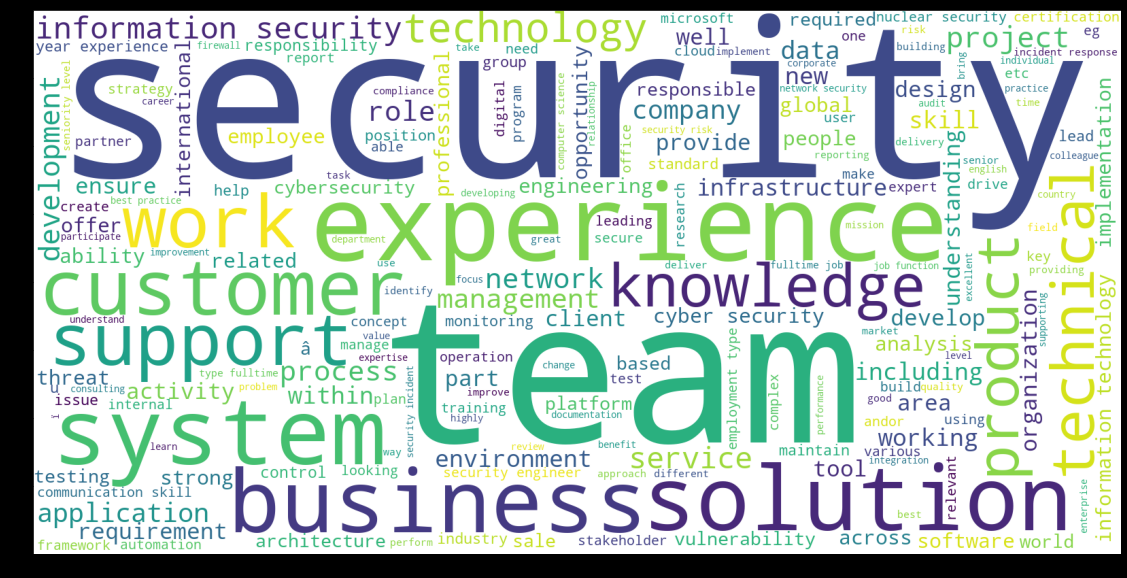

In [4]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

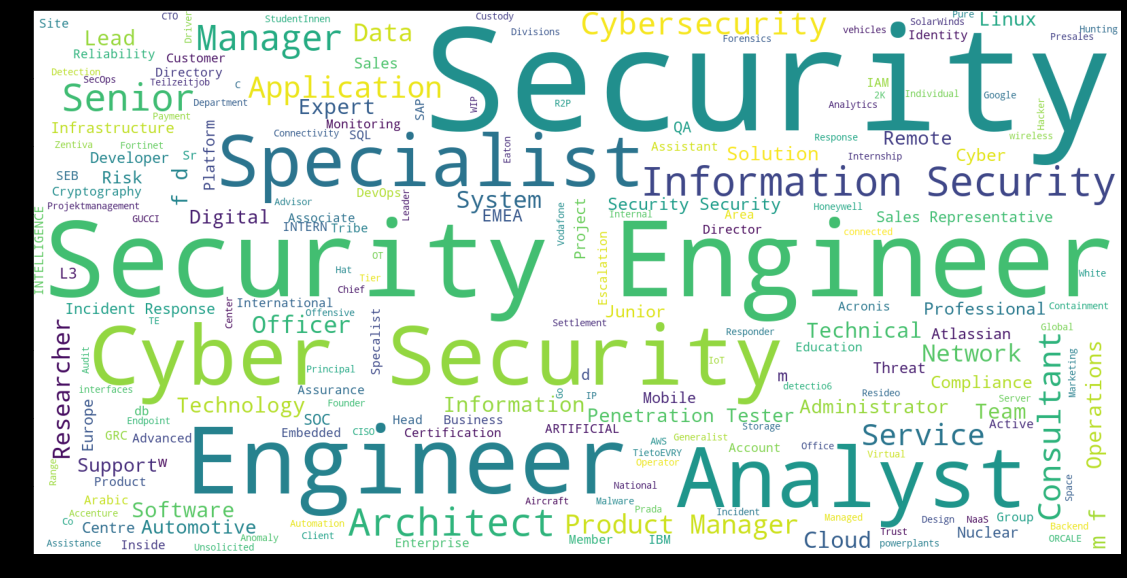

In [5]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['job_title'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

## Job Posting by countries

<AxesSubplot:>

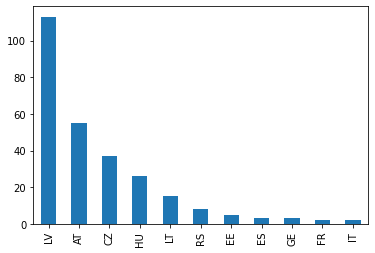

In [6]:
df['country'].value_counts().plot(kind='bar')

### Wordmap by countries

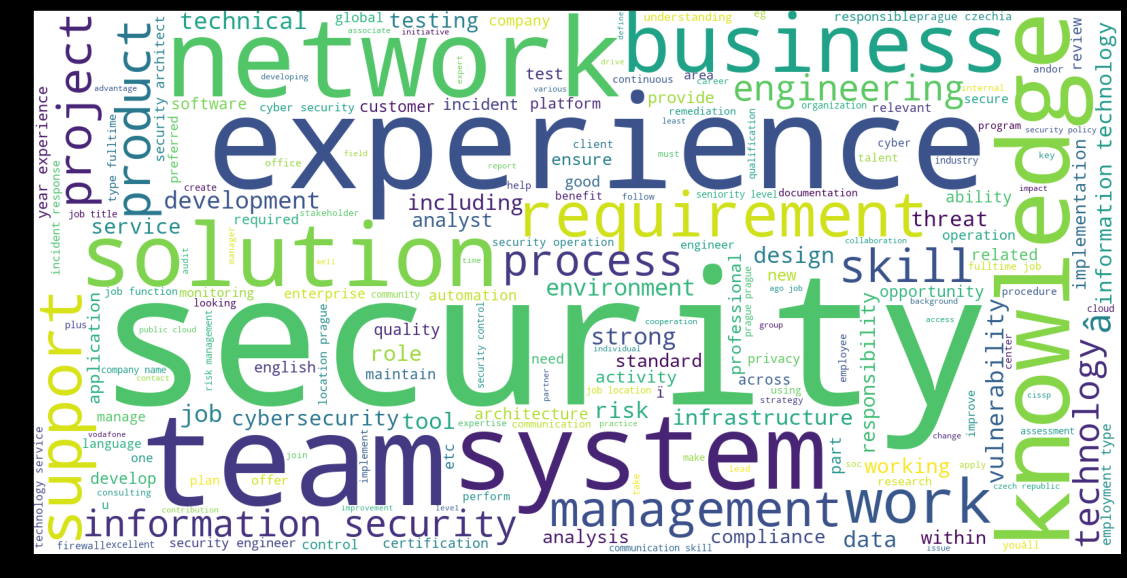

In [7]:
cz_df = df[ df['country'] == 'CZ' ]
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(cz_df['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

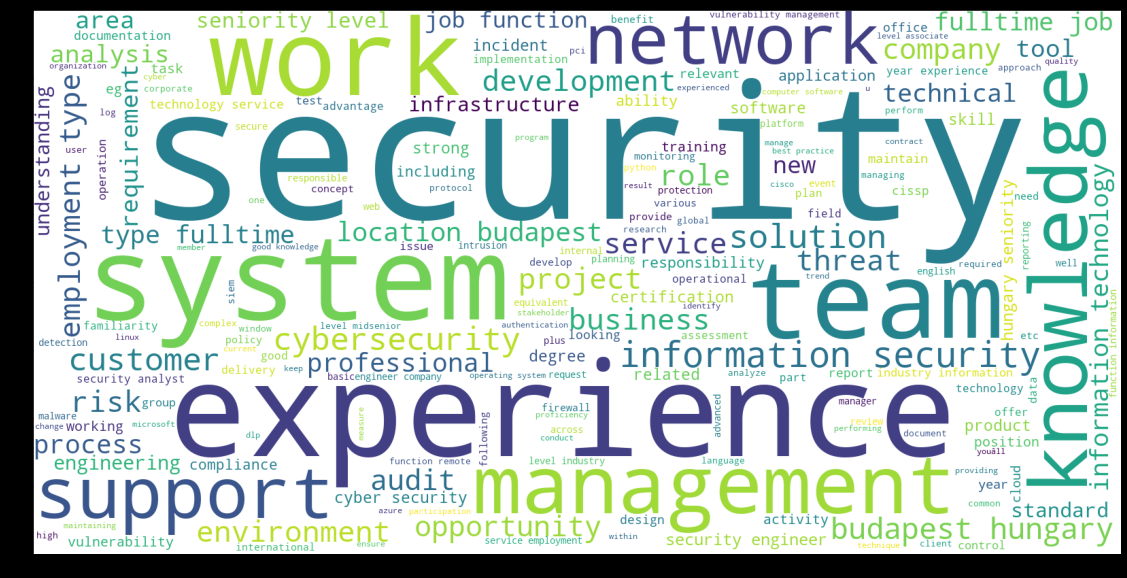

In [8]:
hu_df = df[ df['country'] == 'HU' ]
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(hu_df['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

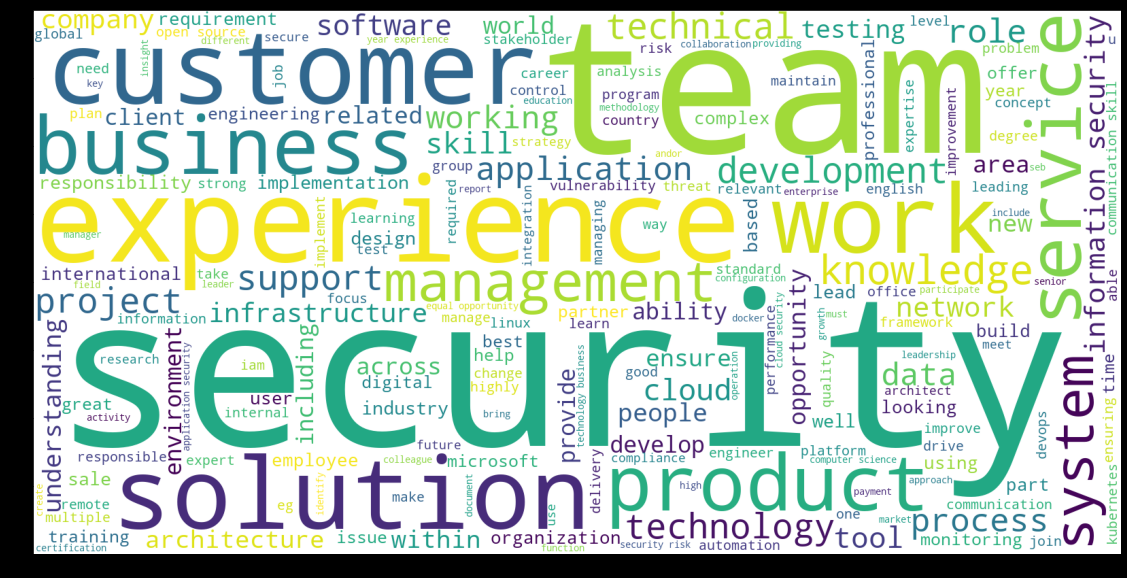

In [9]:
hu_df = df[ df['country'] == 'LV' ]
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(hu_df['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

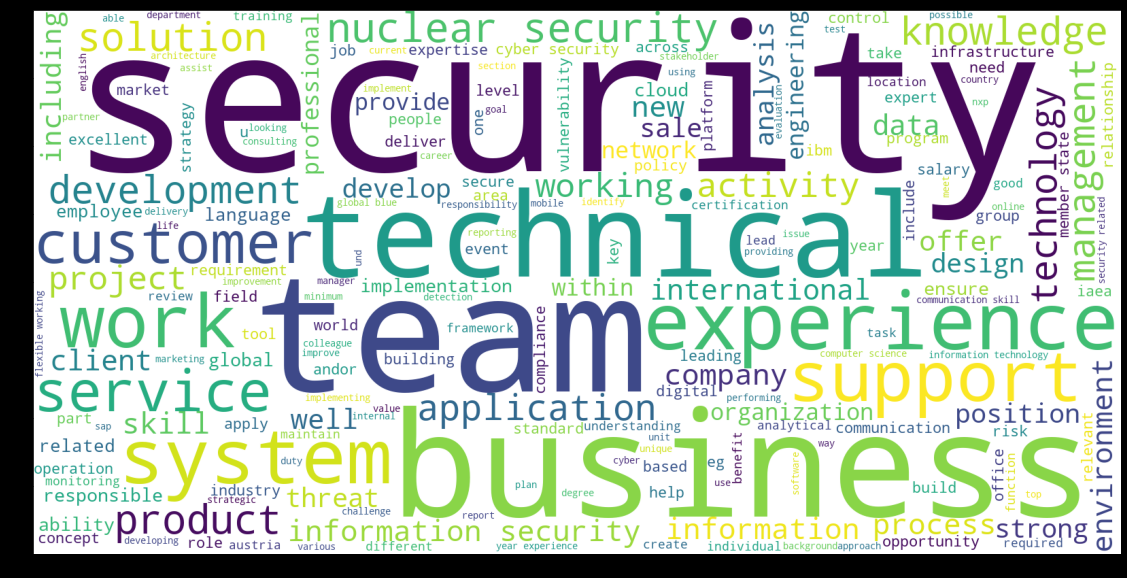

In [10]:
hu_df = df[ df['country'] == 'AT' ]
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(hu_df['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [11]:
df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df.head()

,country,title,text,job_title,polarity,word_count
0,AT,Inform,information technology security manager global...,Information Technology Security Manager,0.072107,732
1,AT,Architect,information security architect copmany swarovs...,Information Security Architect,0.122043,249
2,AT,Manager,information technology security manager copman...,Information Technology Security Manager,0.115965,440
3,AT,Analyst,threat detection analyst company radar cyber s...,Threat Detection Analyst,0.200856,189
4,AT,Engineer,security engineer company global blue location...,IT Security Engineer,0.165756,329


array([[<AxesSubplot:title={'center':'polarity'}>,
        <AxesSubplot:title={'center':'word_count'}>]], dtype=object)

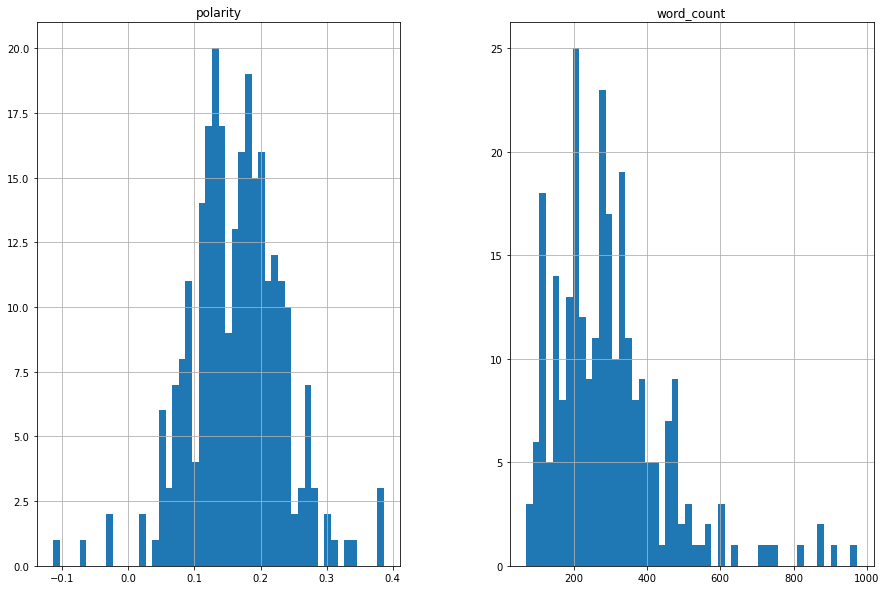

In [12]:
df[['polarity', 'word_count']].hist(bins=50, figsize=(15, 10))

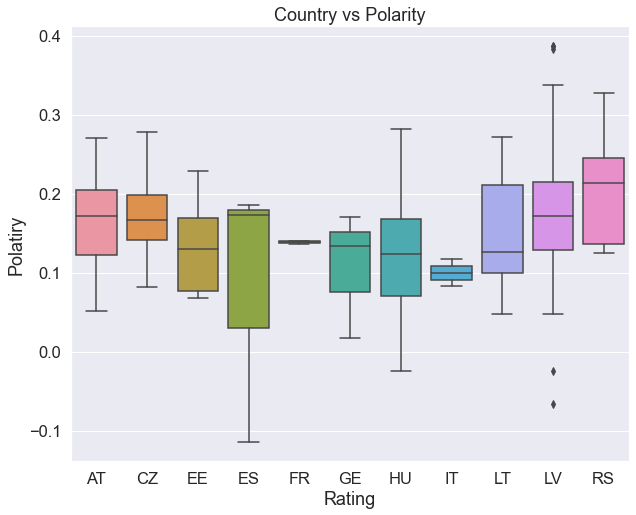

In [14]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'country', y = 'polarity', data = df)
plt.xlabel("Rating")
plt.ylabel("Polatiry")
plt.title("Country vs Polarity")
plt.show()